In [1]:
from goobergrad import nn
from goobergrad import eval
import numpy as np
import matplotlib.pyplot as plt
import mnist

# data processing


In [2]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [3]:
#normalized between 0-1
train_images = train_images / 255
test_images = test_images / 255

5


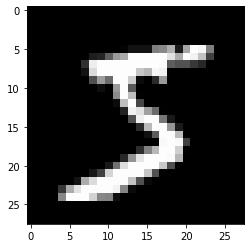

In [4]:
plt.imshow(train_images[0], cmap='gray')
print(train_labels[0])

In [5]:
train_images = train_images.reshape(-1, 28 * 28)
test_images = test_images.reshape(-1, 28 * 28)


In [6]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# model definition

In [7]:
model = nn.MLP([784, 512, 512, 10])

In [8]:
ypred = model(train_images[0])
ypred


[Value(0.12076676038727191),
 Value(0.19558119485732836),
 Value(0),
 Value(0.04835602427120779),
 Value(0.09417888451711592),
 Value(0.10834650692498235),
 Value(0),
 Value(0.017600913941783376),
 Value(0),
 Value(0)]

# training
